In [1]:
# import libraries here; add more as necessary
import pandas as pd
import matplotlib
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import numpy as np 
%matplotlib inline
# magic word for producing visualizations in notebook


### Data Loading And Exploration

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Removing null values in name and host_name fields
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['host_name'])]

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373229,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.680328,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# explore the categories for 'neighbourhood_group'
df.neighbourhood_group.value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# explore the categories for 'neighbourhood'
df.neighbourhood.value_counts()

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Woodrow                  1
New Dorp                 1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [13]:
# explore the categories for 'room_type'
df.room_type.value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

In [14]:
# remove the first two columns for now as it is not needed
df.drop(columns = ['id', 'name'], axis = 1, inplace = True)
df.rename(columns = {
    'calculated_host_listings_count': 'host_listings_count',
    'number_of_reviews': 'reviews_count'
}, inplace = True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
# check for duplicate rows
df.duplicated().value_counts()

## no duplicate rows

False    48858
dtype: int64

In [16]:
# convert the date field
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   host_id              48858 non-null  int64         
 1   host_name            48858 non-null  object        
 2   neighbourhood_group  48858 non-null  object        
 3   neighbourhood        48858 non-null  object        
 4   latitude             48858 non-null  float64       
 5   longitude            48858 non-null  float64       
 6   room_type            48858 non-null  object        
 7   price                48858 non-null  int64         
 8   minimum_nights       48858 non-null  int64         
 9   reviews_count        48858 non-null  int64         
 10  last_review          38821 non-null  datetime64[ns]
 11  reviews_per_month    38821 non-null  float64       
 12  host_listings_count  48858 non-null  int64         
 13  availability_365     48858 non-

### Data Cleaning

In [17]:
# drop 'host_name' column as we can use 'host_id' for identification/uniqueness

df.drop(columns = 'host_name', axis = 1, inplace = True)

In [18]:
# investigate on null values for 'last_review' & 'reviews_per_month'
df[(df['last_review'].isna()) | (df['reviews_per_month'].isna())]

## we can see that the rows that have null for 'last_review', also has null for 'reviews_per_month'

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [19]:
# check if all these entries have 0 reviews
df[(df['last_review'].isna()) | (df['reviews_per_month'].isna())].reviews_count.value_counts()

## reason for having NA, is because these listings never got a single review yet

0    10037
Name: reviews_count, dtype: int64

In [20]:
# for NA 'reviews_per_month', we can impute it with '0' as these listings didnt get any reviews yet
df.reviews_per_month.fillna(value = 0, inplace = True)

In [21]:
# to deal with NA in 'last_review', we change the column to a categorical variable (by year), and those that have NA will be categorised as 'Never', as they did not get any reviews yet
df.last_review = df.last_review.dt.year.astype('object')
df.last_review.fillna(value = 'Never', inplace = True)

In [22]:
# confirm all null values are dealt with
df.isna().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
reviews_count          0
last_review            0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [23]:
df.describe()
## need to look further into max of 'minimum_nights' and min of 'availability_365'

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
df.availability_365.value_counts()
## 0 days availability can possibly refer to the listing not being available at the moment, so we can keep this data

0      17508
365     1294
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [25]:
#check values for 'minimum_nights'
df.minimum_nights.value_counts()

1      12700
2      11694
3       7996
30      3759
4       3297
       ...  
87         1
183        1
39         1
250        1
58         1
Name: minimum_nights, Length: 108, dtype: int64

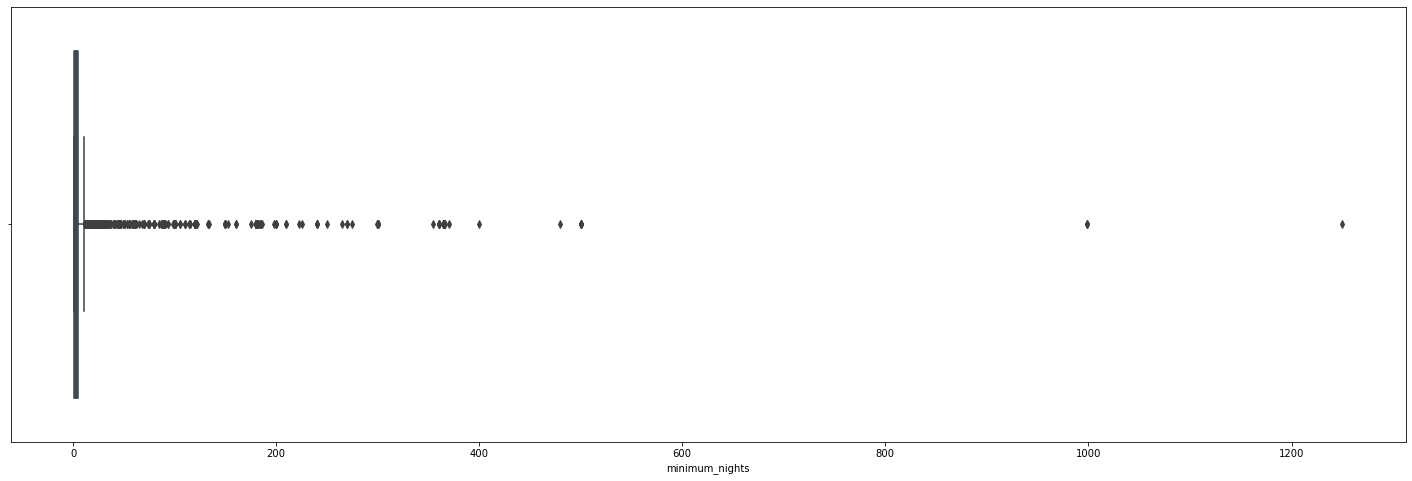

In [26]:
plt.figure(figsize = (25, 8))
sns.boxplot(df['minimum_nights'])

## can see some extreme outliers

In [27]:
#check how many listings have minimum nights set to more than a year
df.loc[df['minimum_nights'] > 365]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
1305,2798644,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018,0.09,1,365
5767,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014,0.03,1,365
7355,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018,0.57,1,90
8014,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,Never,0.00,1,362
10829,43945071,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,Never,0.00,1,365
11193,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016,0.22,1,365
13404,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018,0.07,1,42
14285,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,Never,0.00,1,358
15946,16476167,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,Never,0.00,1,365
26341,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018,1.12,6,249


In [28]:
# Therefore, we will only consider listings that have minimum nights set to a year or less.
df = df.loc[df['minimum_nights'] <= 365]

In [29]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,reviews_count,reviews_per_month,host_listings_count,availability_365
count,4.884500e+04,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000
mean,6.763827e+07,40.728941,-73.952168,152.749718,6.843096,23.277777,1.091371,7.149903,112.755451
std,7.862696e+07,0.054529,0.046164,240.261660,16.457225,44.554628,1.597402,32.968845,131.583660
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.821383e+06,40.690080,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079724e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936270,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


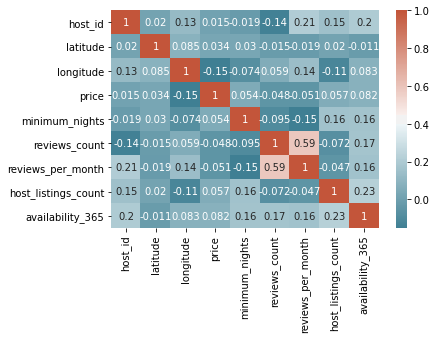

In [30]:
# getting the correlation between respective columns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels= corr.columns, annot=True,
           cmap=sns.diverging_palette(220, 20, as_cmap=True));

### Hosts

In [31]:
# it shows the top hosts of newyork city using Airbnb 
top_host= df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [32]:
top_host_plot = pd.DataFrame(top_host)
top_host_plot.reset_index(inplace=True)
top_host_plot.rename(columns={'index': 'Host_id', 'host_id':'Num_prop'}, inplace=True)
top_host_plot

,Host_id,Num_prop
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


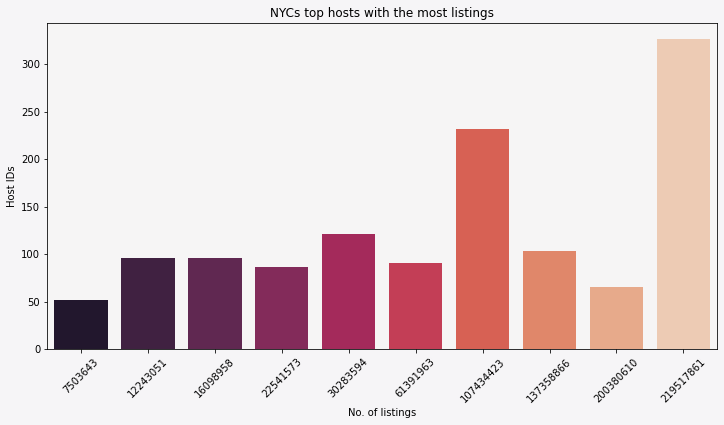

In [33]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')

plt_1= sns.barplot(y= 'Num_prop',x='Host_id', data=top_host_plot, palette='rocket')
plt_1.set_title('NYCs top hosts with the most listings')
plt_1.set_xlabel('No. of listings')
plt_1.set_ylabel('Host IDs')
plt_1.set_xticklabels(plt_1.get_xticklabels(), rotation=45);


### Neighbourhood

In [34]:
# lets check the neighbourhood wrt prices

df.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [35]:
# we can see that there are some extreme values in price so we would be taking 500
price_range= df[df.price < 500 ]


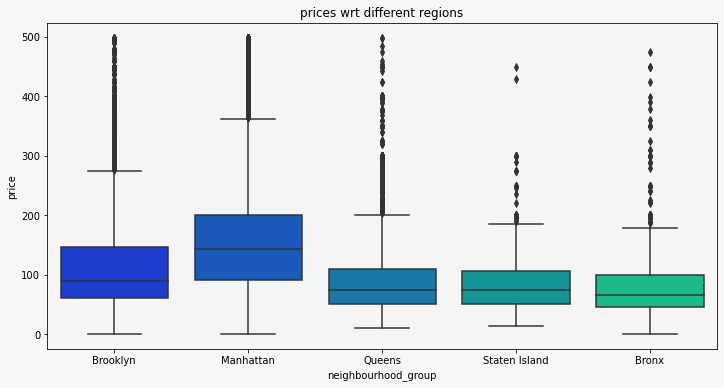

In [36]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')

plt_2=sns.boxplot(x='neighbourhood_group',y='price', data= price_range,palette='winter')
plt_2.set_title('prices wrt different regions');

* from this plot, the average price across all neighbourhoods is less than $100 

### Room types

In [37]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [38]:
neighbourhood_room_type = df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)

In [39]:
neighbourhood_room_type

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,378,9551,13186,2094,176
Private room,652,10119,7973,3370,188
Shared room,59,413,479,198,9


Entire home/apt    25385
Private room       22302
Shared room         1158
Name: room_type, dtype: int64


<Figure size 864x432 with 0 Axes>

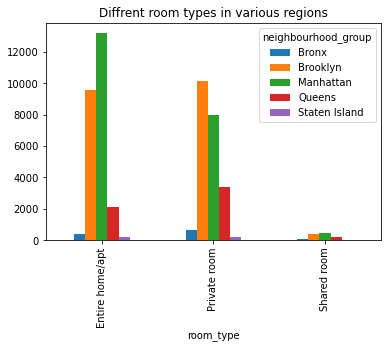

In [40]:
fig=plt.figure(figsize = (12,6));
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')

plt_3 = neighbourhood_room_type.plot(kind='bar')
plt.title('Diffrent room types in various regions')
print(df.room_type.value_counts());

* Entire home/apt is the most preferred of all room types across all neighbourhoods, Manhattan holding that position. For the Private rooms, Brooklyn holds the position for most listing.

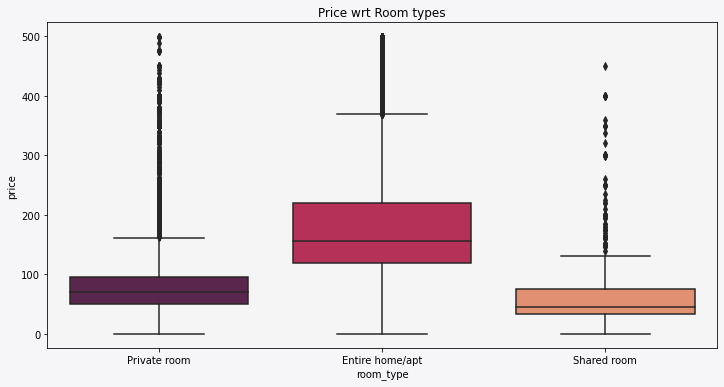

In [41]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')

plt_5= sns.boxplot(x= 'room_type', y= 'price', data= price_range, palette= 'rocket')
plt_5.set_title('Price wrt Room types');

In [43]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018,0.10,1,0


In [ ]:
# Breaking down the top 10 hosts across all neighourhoods to get the top 10 hosts as vizualised earleir above

In [57]:
filt= df['neighbourhood_group'] == "Manhattan"

In [59]:
df.loc[filt]["host_id"].value_counts().head(10)

219517861    327
107434423    230
30283594     121
16098958      96
12243051      96
61391963      91
22541573      86
200380610     65
1475015       52
120762452     50
Name: host_id, dtype: int64

In [60]:
filt1= df['neighbourhood_group'] == "Brooklyn"

In [61]:
df.loc[filt1]["host_id"].value_counts().head(10)

7503643      52
26377263     35
119669058    34
417504       28
226410657    27
230192510    25
213781715    23
16437254     21
9864136      19
216235179    17
Name: host_id, dtype: int64

In [62]:
filt2= df['neighbourhood_group'] == "Staten Island"

In [63]:
df.loc[filt2]["host_id"].value_counts().head(10)

104812805    8
104927746    7
50756378     7
137999892    7
117492425    6
303939       6
99202586     5
92493393     5
1360198      4
43392243     4
Name: host_id, dtype: int64

In [64]:
filt3= df['neighbourhood_group'] == "Bronx"

In [65]:
df.loc[filt3]["host_id"].value_counts().head(10)

310670       13
23878336     10
35783912      8
30509656      8
174785358     7
2988712       7
273354185     7
295128        7
32164030      6
203266238     5
Name: host_id, dtype: int64

In [66]:
filt4= df['neighbourhood_group'] == "Queens"

In [67]:
df.loc[filt4]["host_id"].value_counts().head(10)

137358866    79
19303369     29
242962235    23
134184451    18
3250450      16
5962328      15
200239515    15
175730239    12
65809485     12
259796664    10
Name: host_id, dtype: int64

In [42]:
#Which hosts are the busiest and why?
#What areas have more traffic than others, and why is that the case?
#Are there any relationships between prices, number of reviews, and the number of days that a given listing is booked?